In [429]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

Source: http://hdr.undp.org/en/dashboard-human-development-anthropocene

In [430]:
df = pd.read_csv('data/UNDP-HDR-2020-All-Dimensions.csv', encoding = "ISO-8859-1")
df

,ISO3,Country,HDI.code,Region,forestchange_1990,forestchange_1991,forestchange_1992,forestchange_1993,forestchange_1994,forestchange_1995,...,terrestrialprotect_2011,terrestrialprotect_2012,terrestrialprotect_2013,terrestrialprotect_2014,terrestrialprotect_2015,terrestrialprotect_2016,terrestrialprotect_2017,terrestrialprotect_2018,terrestrialprotect_2019,terrestrialprotect_latestyear
0,AFG,Afghanistan,Low,SA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,0.104707,NaN,NaN
1,AGO,Angola,Medium,SSA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.970000,NaN,6.971427,NaN,NaN
2,ALB,Albania,High,ECA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.210000,NaN,17.736095,NaN,NaN
3,AND,Andorra,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.190000,NaN,26.727725,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.070000,NaN,17.954921,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,Europe and Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.095942,NaN,4.127749,NaN,NaN
202,NaN,Latin America and the Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.093904,NaN,23.446978,NaN,NaN
203,NaN,South Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.658930,NaN,7.659244,NaN,NaN
204,NaN,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.779645,NaN,17.677531,NaN,NaN


# Canada

In [431]:
dfc = df[df.Country == 'Canada'].T

In [432]:
hdic = dfc[dfc.index.str.contains('hdi_')]
hdic = hdic.iloc[:30]
hdic.index = hdic.index.str.replace('hdi_' , '')
hdic.columns = ['Value']
hdic.tail(5)

,Value
2015,0.921
2016,0.923
2017,0.926
2018,0.928
2019,0.929


Text(0, 0.5, 'Human Development Index')

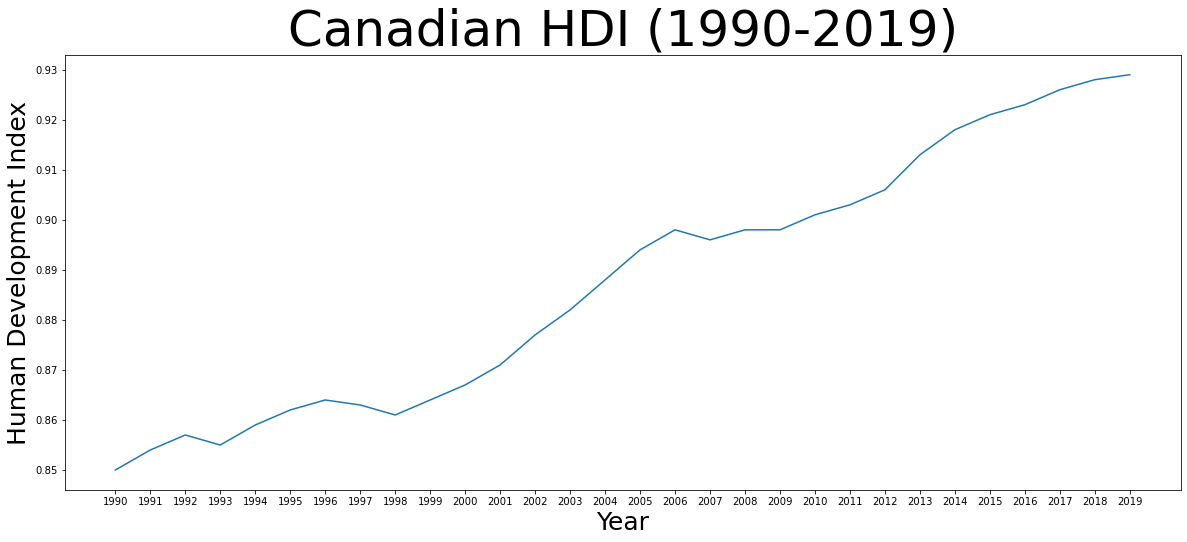

In [433]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdic)
plt.title("Canadian HDI (1990-2019)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)

# Projected Canadian HDI in 2020 without COVID-19

## Life Expectancy Index

Source: https://www.macrotrends.net/countries/CAN/canada/life-expectancy#:~:text=The%20current%20life%20expectancy%20for,a%200.1%25%20increase%20from%202017.

In [434]:
lecp = 82.5 # Life Expectancy at Birth (years)

In [435]:
leicp = ((lecp) - 20) / (85 - 20)
leicp

0.9615384615384616

## Education Index

Source: http://hdr.undp.org/en/countries/profiles/CAN

In [436]:
mscp = 13.4 #Mean Years of Schooling for ages 25 and above (years)

In [437]:
escp = 16.2 #Expected Schooling (years)

In [438]:
if (escp > 18):
    eicp = ((mscp / 15) + 1) / 2
else:
    eicp = ((mscp / 15) + (escp / 18)) / 2
eicp

0.8966666666666666

## Gross National Income (GNI) per Capita Index

In [439]:
gnicp = 48_527

In [440]:
gniicp = (math.log(gnicp) - math.log(100)) / (math.log(75000) - math.log(100))
gniicp

0.9342352031646705

In [441]:
hdi_projected = (leicp + eicp + gniicp) / 3
hdi_projected

0.9308134437899329

In [442]:
hdicp = hdic.copy()
hdicp.loc['2020'] = hdi_projected
hdicp.tail(3)

,Value
2018,0.928
2019,0.929
2020,0.930813


Text(0, 0.5, 'Human Development Index')

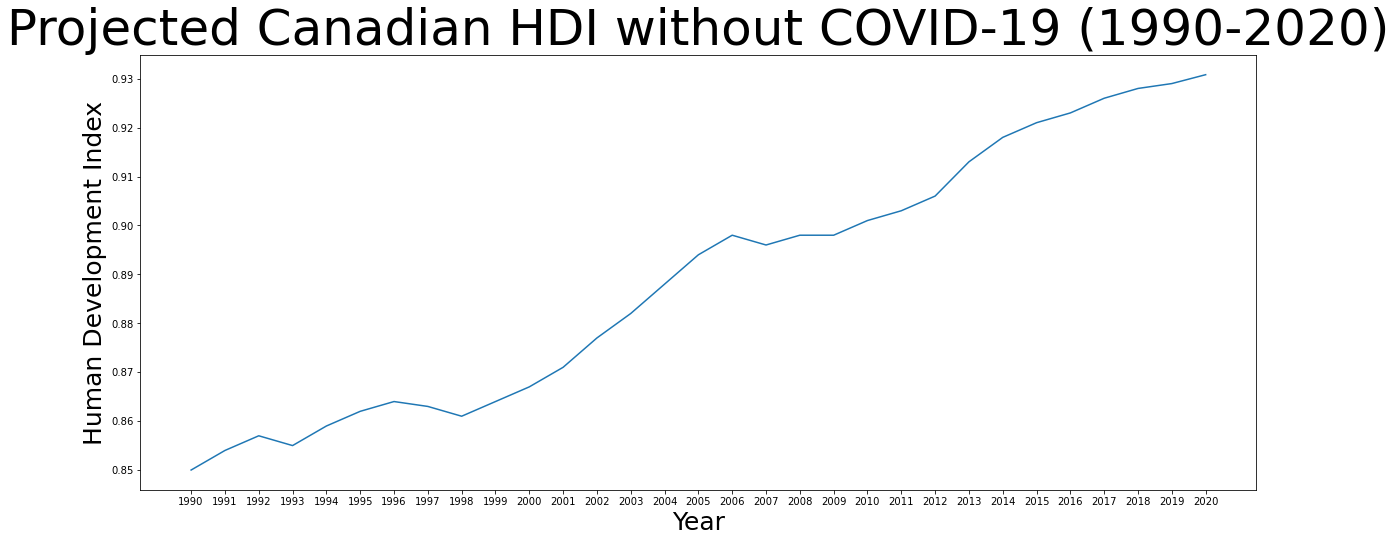

In [443]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdicp)
plt.title("Projected Canadian HDI without COVID-19 (1990-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)

# Estimated Canadian HDI in 2020

## Life Expectancy Index

Source: https://www.worldometers.info/world-population/canada-population/

In [444]:
can_pop = 37_903_125 # Canadian Population

Source: https://covid19.who.int/region/amro/country/ca

In [445]:
can_cases = 515_314 # Number of Covid-19 Cases in Canada

In [446]:
can_inf_rate = (can_cases / can_pop) * 100
can_inf_rate

1.3595554456261851

Source: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0238678#:~:text=Given%20the%20uncertainty%20in%20fatality,4%20years%20in%20sub%2DSaharan

Since the prevalence rate is currently 1.36%, the average life expectancy is estimated to be reduced by approximately 0.1 year.

In [447]:
lece = lecp - 0.1 # Life Expectancy at Birth (years)
lece

82.4

In [448]:
leice = ((lece) - 20) / (85 - 20)
leice

0.9600000000000001

## Education Index

If we estimate a fifth of the school year was lost this year in Canada, we estimate the mean years of schooling and the expected schooling will be reduced by 0.05 years.

In [449]:
msce = mscp - 0.05 #Mean Years of Schooling for ages 25 and above (years)
msce

13.35

In [450]:
esce = escp - 0.05 #Expected Schooling (years)
esce

16.15

In [451]:
if (esce > 18):
    eice = ((msce / 15) + 1) / 2
else:
    eice = ((msce / 15) + (esce / 18)) / 2
eice

0.8936111111111111

## Gross National Income (GNI) per Capita Index

Source: https://econtutorials.com/blog/difference-gdp-gnp/

We estimate a decrease in GDP will give a comparable decrease in GNI.

Source: https://www.imf.org/external/datamapper/NGDPDPC@WEO/WEOWORLD/CAN

In [452]:
can_gni_dec = (42.08 - 46.27) / 46.27
can_gni_dec

-0.09055543548735692

In [453]:
gnice = gnicp + (can_gni_dec * gnicp)
gnice

44132.61638210503

In [454]:
gniice = (math.log(gnice) - math.log(100)) / (math.log(75000) - math.log(100))
gniice

0.9198968066653962

In [455]:
hdi_estimated = (leice + eice + gniice) / 3
hdi_estimated

0.9245026392588359

In [456]:
hdice = hdic.copy()
hdice.loc['2020'] = hdi_estimated

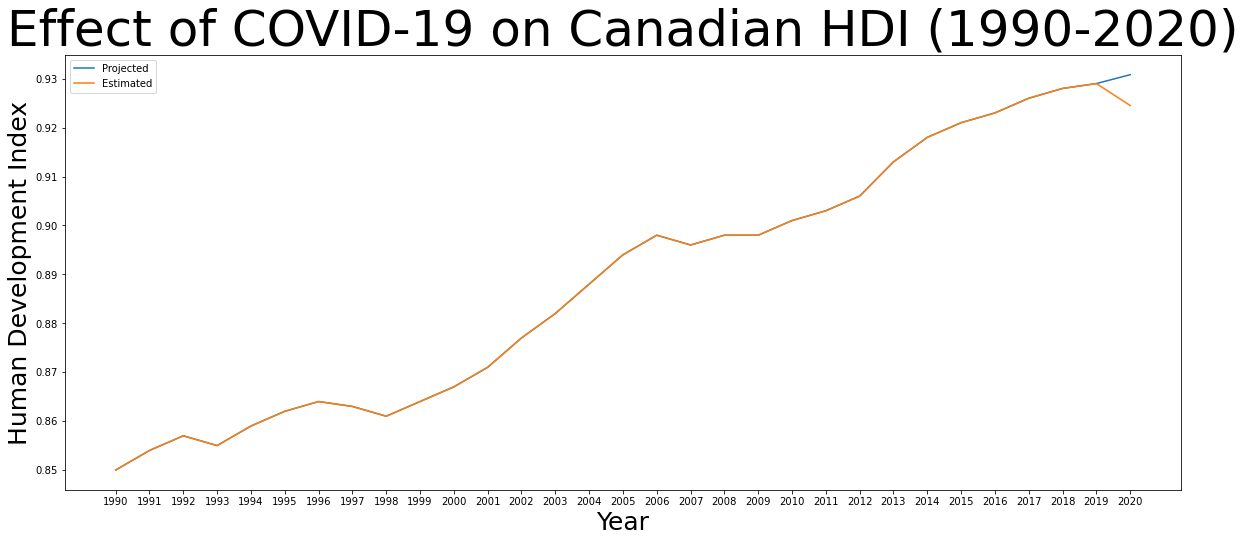

In [457]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdicp)
plt.plot(hdice)
plt.title("Effect of COVID-19 on Canadian HDI (1990-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

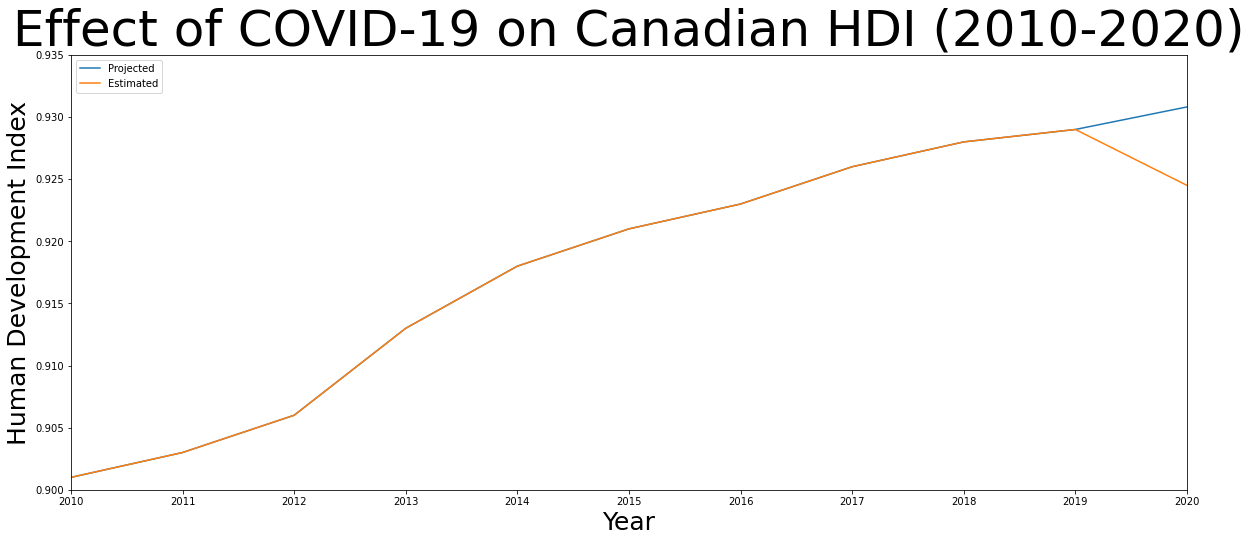

In [458]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdicp)
plt.plot(hdice)
ax.set_xlim("2010", "2020")
ax.set_ylim(0.9, 0.935)
plt.title("Effect of COVID-19 on Canadian HDI (2010-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

In [459]:
hdicp['Change'] = hdicp.Value - hdicp.Value.shift()

In [460]:
hdice['Change'] = hdice.Value - hdice.Value.shift()

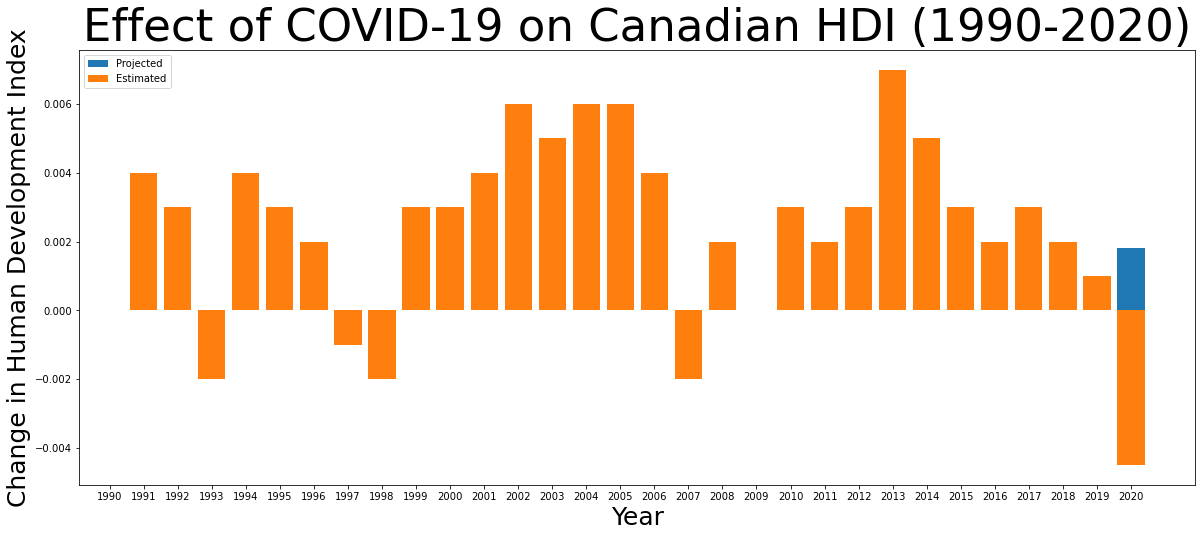

In [502]:
fig, ax = plt.subplots(figsize = (20,8))
plt.bar(height=hdicp['Change'], x=hdicp.index)
plt.bar(height=hdice['Change'], x=hdice.index)
plt.title("Effect of COVID-19 on Canadian HDI (1990-2020)", fontsize=45)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Change in Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

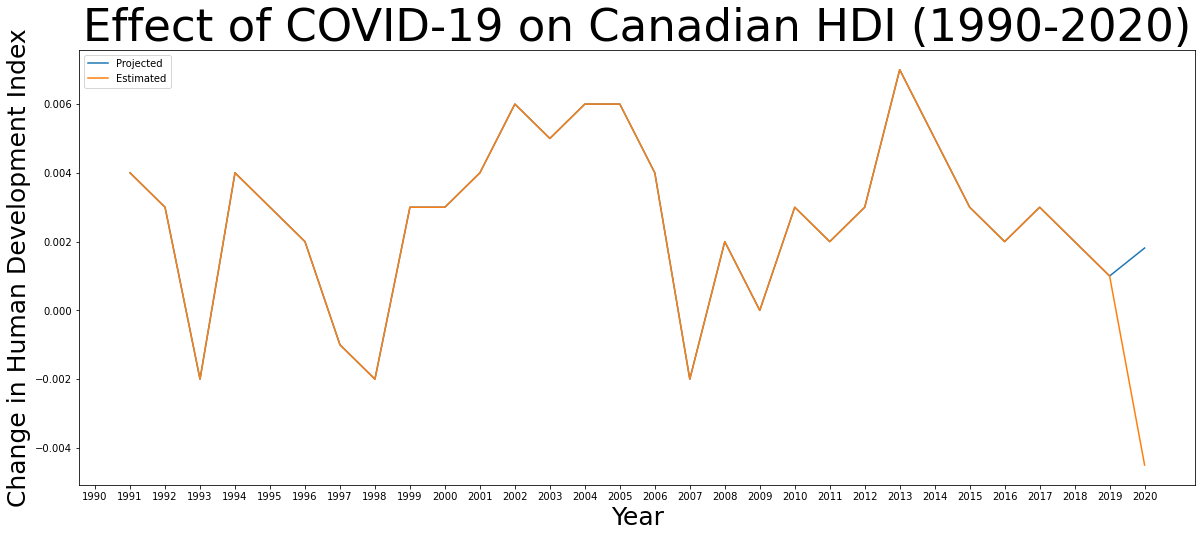

In [461]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(hdicp['Change'])
ax.plot(hdice['Change'])
plt.title("Effect of COVID-19 on Canadian HDI (1990-2020)", fontsize=45)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Change in Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

# World

In [462]:
dfw = df[df.Country == 'World'].T

In [463]:
hdiw = dfw[dfc.index.str.contains('hdi_')]
hdiw = hdiw.iloc[:30]
hdiw.index = hdiw.index.str.replace('hdi_' , '')
hdiw.columns = ['Value']
hdiw.tail(5)

,Value
2015,0.724
2016,0.727
2017,0.732
2018,0.734
2019,0.737


Text(0, 0.5, 'Human Development Index')

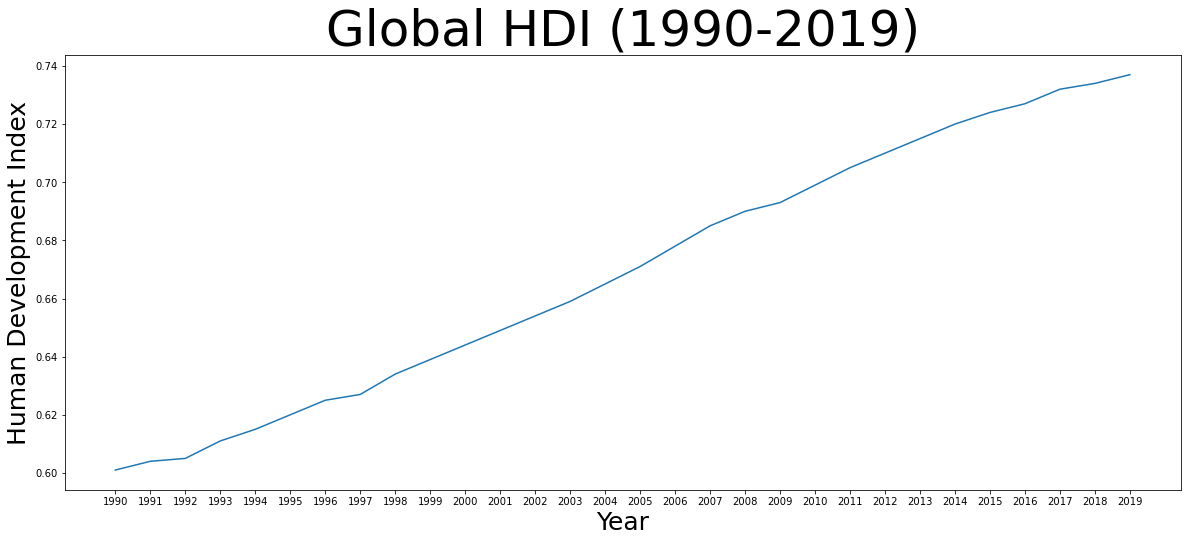

In [464]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdiw)
plt.title("Global HDI (1990-2019)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)

# Projected Global HDI in 2020 without COVID-19

## Life Expectancy Index

Source: http://hdr.undp.org/en/indicators/69206

In [465]:
lewp = 72.8 # Life Expectancy at Birth (years)

In [466]:
leiwp = ((lewp) - 20) / (85 - 20)
leiwp

0.8123076923076923

## Education Index

Source: http://hdr.undp.org/en/indicators/103006

In [467]:
mswp = 8.5 #Mean Years of Schooling for ages 25 and above (years)

Source: http://hdr.undp.org/en/indicators/69706

In [468]:
eswp = 12.7 #Expected Schooling (years)

In [469]:
if (eswp > 18):
    eiwp = ((mswp / 15) + 1) / 2
else:
    eiwp = ((mswp / 15) + (eswp / 18)) / 2
eiwp

0.6361111111111111

## Gross National Income (GNI) per Capita Index

Source: http://hdr.undp.org/en/indicators/195706

In [470]:
gniwp = 16_734

In [471]:
gniiwp = (math.log(gniwp) - math.log(100)) / (math.log(75000) - math.log(100))
gniiwp

0.7734095245074954

In [472]:
hdi_projected = (leiwp + eiwp + gniiwp) / 3
hdi_projected

0.7406094426420996

In [473]:
hdiwp = hdiw.copy()
hdiwp.loc['2020'] = hdi_projected
hdiwp.tail(3)

,Value
2018,0.734
2019,0.737
2020,0.740609


Text(0, 0.5, 'Human Development Index')

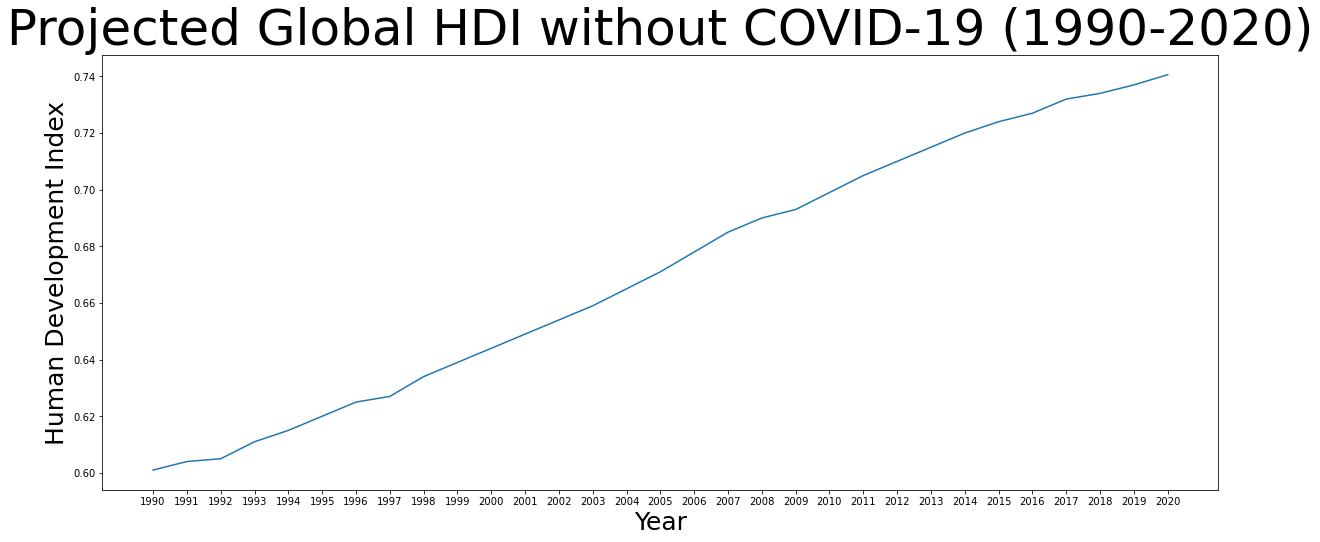

In [474]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdiwp)
plt.title("Projected Global HDI without COVID-19 (1990-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)

# Estimated Global HDI in 2020

## Life Expectancy Index

Source: https://www.worldometers.info/world-population/#:~:text=7.8%20Billion%20(2020),currently%20living)%20of%20the%20world.

In [475]:
world_pop = 7_834_078_000 # Global Population

Source: https://covid19.who.int/

In [476]:
world_cases = 76_382_044 # Global Number of Covid-19 Cases

In [477]:
world_inf_rate = (world_cases / world_pop) * 100
world_inf_rate

0.9749972364329281

Since the prevalence rate is currently 0.97%, the average life expectancy is again estimated to be reduced by approximately 0.1 year.

In [478]:
lewe = lewp - 0.1 # Life Expectancy at Birth (years)
lewe

72.7

In [479]:
leiwe = ((lewe) - 20) / (85 - 20)
leiwe

0.8107692307692308

## Education Index

Source: http://hdr.undp.org/en/content/covid-19-human-development-course-decline-year-first-time-1990

If 60% of children are not getting an education, we estimate the mean years of schooling and the expected schooling will be reduced by 0.15 years.

In [480]:
mswe = mswp - 0.15 #Mean Years of Schooling for ages 25 and above (years)
mswe

8.35

In [481]:
eswe = eswp - 0.15 #Expected Schooling (years)
eswe

12.549999999999999

In [482]:
if (eswe > 18):
    eiwe = ((mswe / 15) + 1) / 2
else:
    eiwe = ((mswe / 15) + (eswe / 18)) / 2
eiwe

0.6269444444444444

## Gross National Income (GNI) per Capita Index

Once again, we estimate a decrease in GDP will give a comparable decrease in GNI.

Source: https://www.imf.org/external/datamapper/NGDPDPC@WEO/WEOWORLD

In [483]:
world_gni_dec = (10.95 - 11.56) / 11.56
world_gni_dec

-0.0527681660899655

In [484]:
gniwe = gniwp + (world_gni_dec * gniwp)
gniwe

15850.977508650518

In [485]:
gniiwe = (math.log(gniwe) - math.log(100)) / (math.log(75000) - math.log(100))
gniiwe

0.7652205807767456

In [486]:
hdi_estimated = (lei + ei + gnii) / 3
hdi_estimated

0.725144751996807

In [487]:
hdiwe = hdiw.copy()
hdiwe.loc['2020'] = hdi_estimated

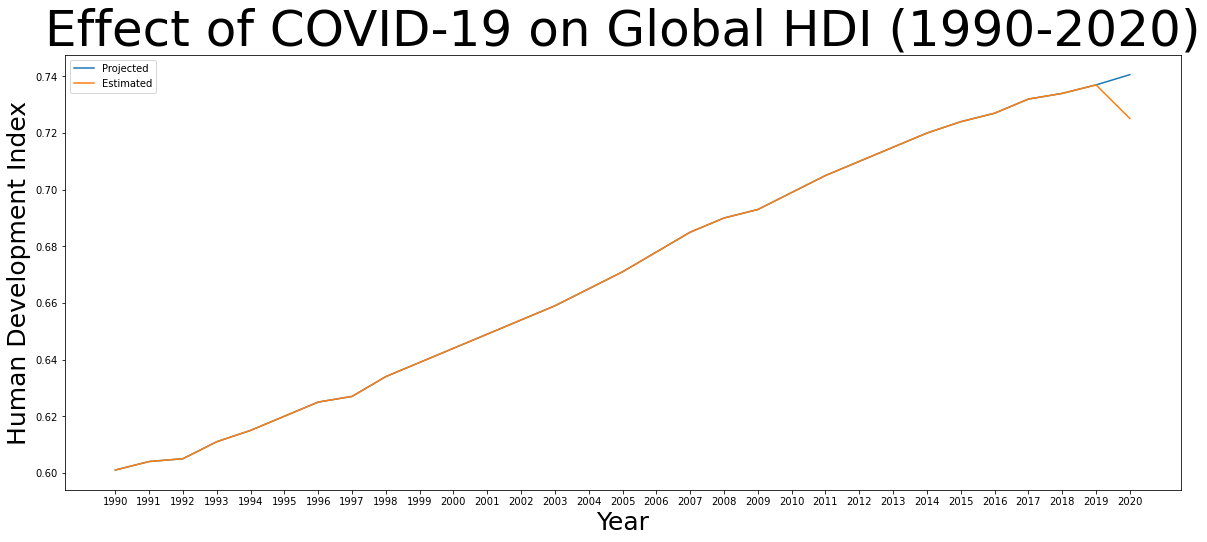

In [488]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdiwp)
plt.plot(hdiwe)
plt.title("Effect of COVID-19 on Global HDI (1990-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

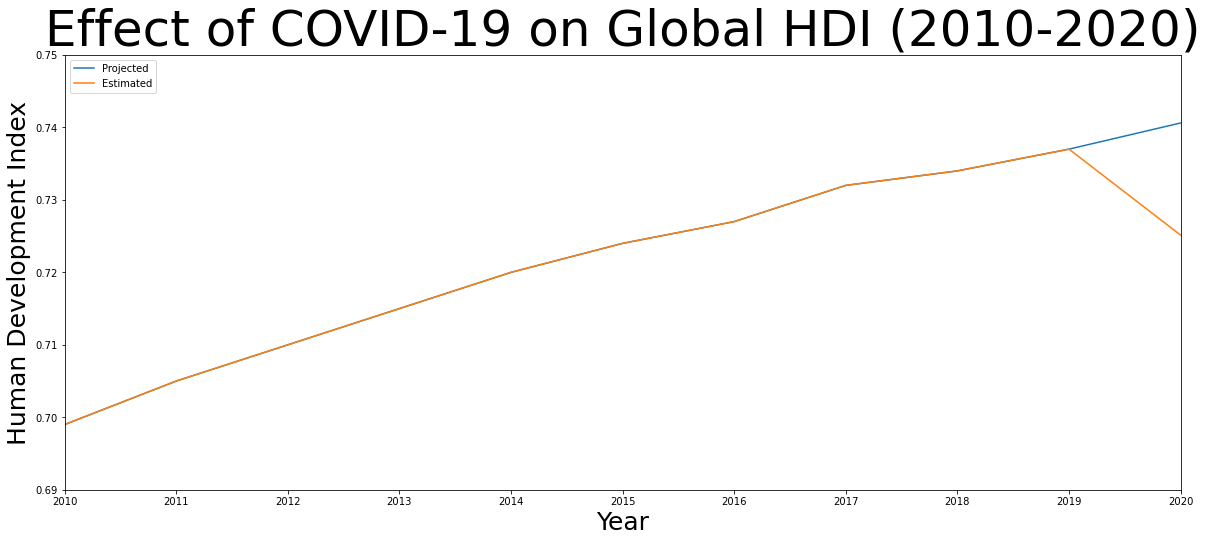

In [489]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdiwp)
plt.plot(hdiwe)
ax.set_xlim("2010", "2020")
ax.set_ylim(0.69, 0.75)
plt.title("Effect of COVID-19 on Global HDI (2010-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

In [490]:
hdiwp['Change'] = hdiwp.Value - hdiwp.Value.shift()

In [491]:
hdiwe['Change'] = hdiwe.Value - hdiwe.Value.shift()

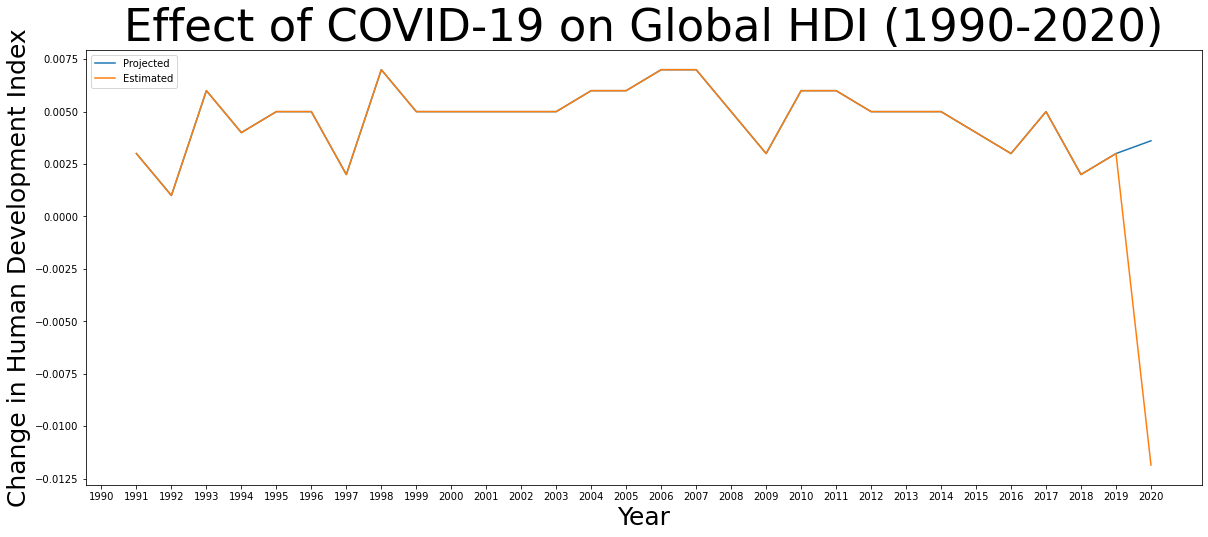

In [492]:
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(hdiwp['Change'])
ax.plot(hdiwe['Change'])
plt.title("Effect of COVID-19 on Global HDI (1990-2020)", fontsize=45)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Change in Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

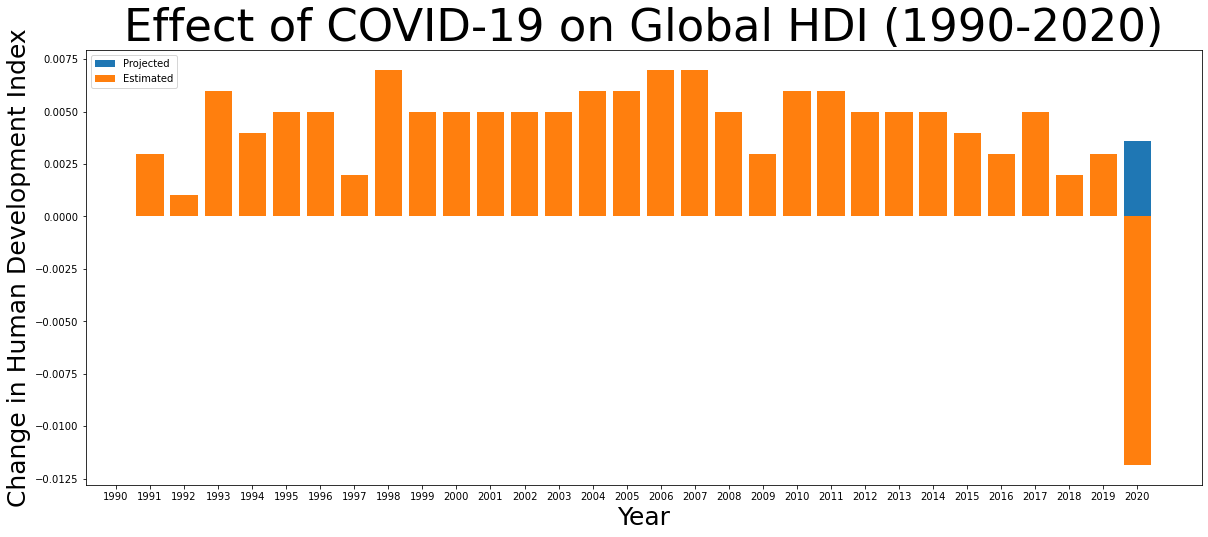

In [493]:
fig, ax = plt.subplots(figsize = (20,8))
plt.bar(height=hdiwp['Change'], x=hdiwp.index)
plt.bar(height=hdiwe['Change'], x=hdiwe.index)
plt.title("Effect of COVID-19 on Global HDI (1990-2020)", fontsize=45)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Change in Human Development Index", fontsize=25)
ax.legend(('Projected', 'Estimated'), loc='upper left')

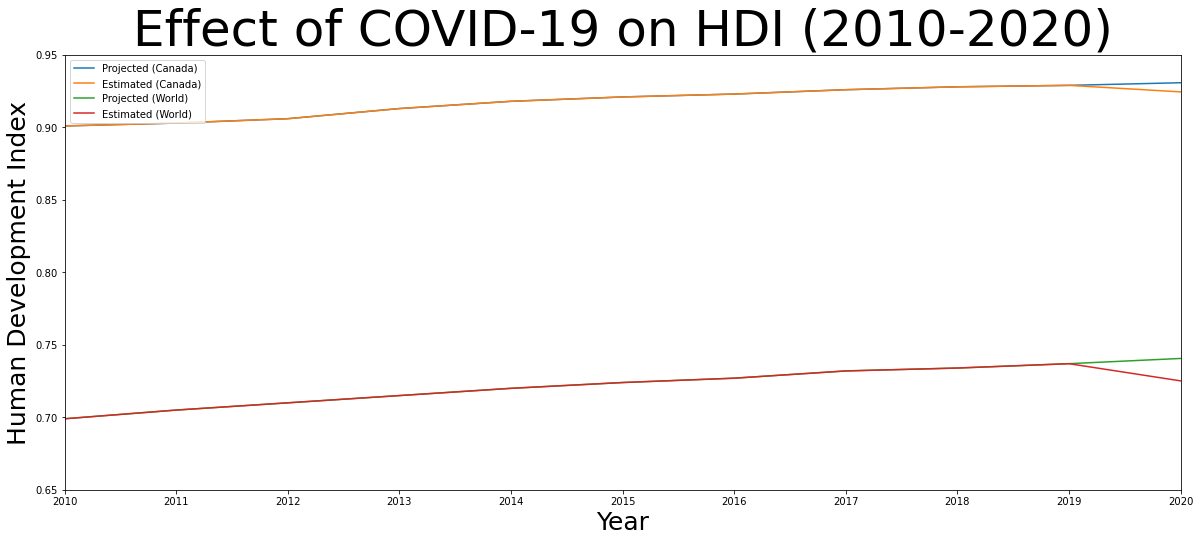

In [500]:
fig, ax = plt.subplots(figsize = (20,8))
plt.plot(hdicp['Value'])
plt.plot(hdice['Value'])
plt.plot(hdiwp['Value'])
plt.plot(hdiwe['Value'])
ax.set_xlim("2010", "2020")
ax.set_ylim(0.65, 0.95)
plt.title("Effect of COVID-19 on HDI (2010-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)
ax.legend(('Projected (Canada)', 'Estimated (Canada)', 'Projected (World)', 'Estimated (World)'), loc='upper left')

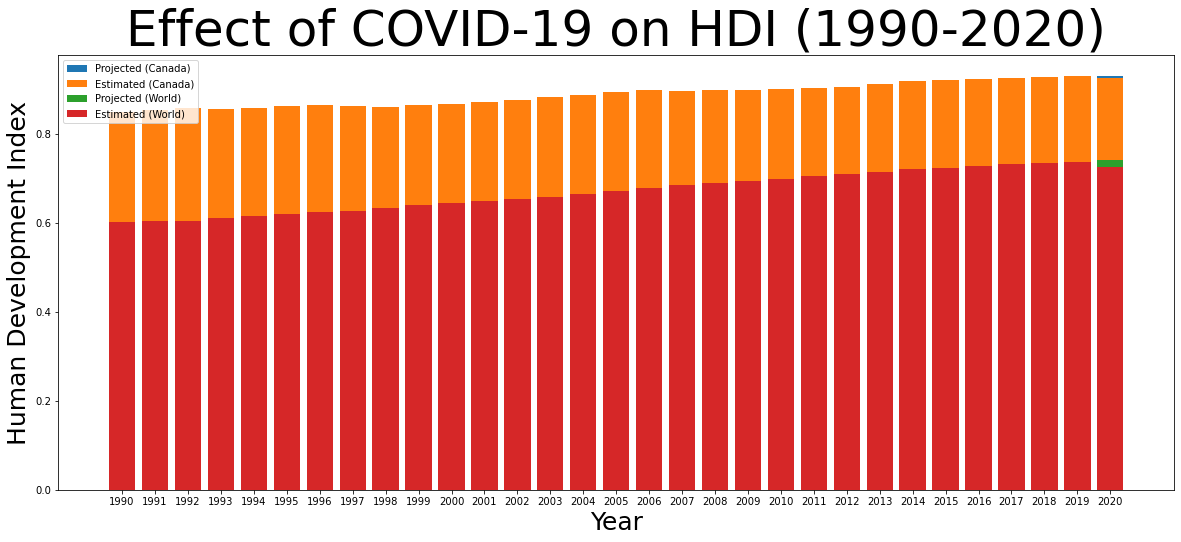

In [501]:
fig, ax = plt.subplots(figsize = (20,8))
plt.bar(height=hdicp['Value'], x=hdicp.index)
plt.bar(height=hdice['Value'], x=hdice.index)
plt.bar(height=hdiwp['Value'], x=hdiwp.index)
plt.bar(height=hdiwe['Value'], x=hdiwe.index)
plt.title("Effect of COVID-19 on HDI (1990-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Human Development Index", fontsize=25)
ax.legend(('Projected (Canada)', 'Estimated (Canada)', 'Projected (World)', 'Estimated (World)'), loc='upper left')

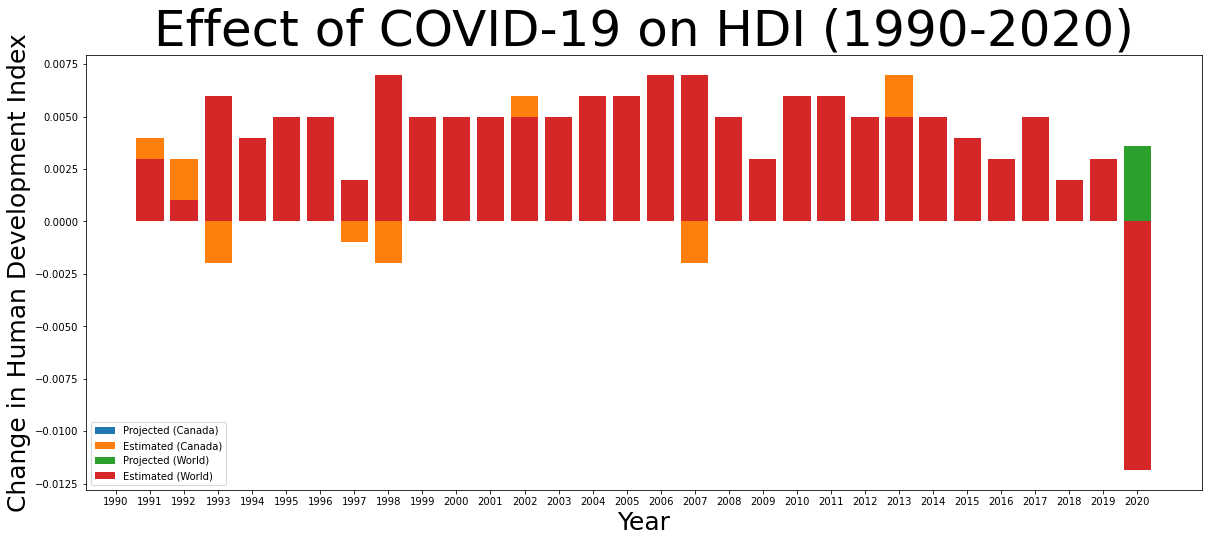

In [499]:
fig, ax = plt.subplots(figsize = (20,8))
plt.bar(height=hdicp['Change'], x=hdicp.index)
plt.bar(height=hdice['Change'], x=hdice.index)
plt.bar(height=hdiwp['Change'], x=hdiwp.index)
plt.bar(height=hdiwe['Change'], x=hdiwe.index)
plt.title("Effect of COVID-19 on HDI (1990-2020)", fontsize=50)
ax.set_xlabel("Year", fontsize=25)
ax.set_ylabel("Change in Human Development Index", fontsize=25)
ax.legend(('Projected (Canada)', 'Estimated (Canada)', 'Projected (World)', 'Estimated (World)'), loc='lower left')

In [497]:
df = pd.DataFrame()
df['ind'] = [leiwe - leiwp, eiwe - eiwp, gniiwe - gniiwp]
tot_reduction = df.ind.sum()
df['percentage'] = df.ind / tot_reduction
df

,ind,percentage
0,-0.001538,0.081426
1,-0.009167,0.485161
2,-0.008189,0.433413


Text(0.5, 1.6, 'Components of Estimated Global HDI Reduction')

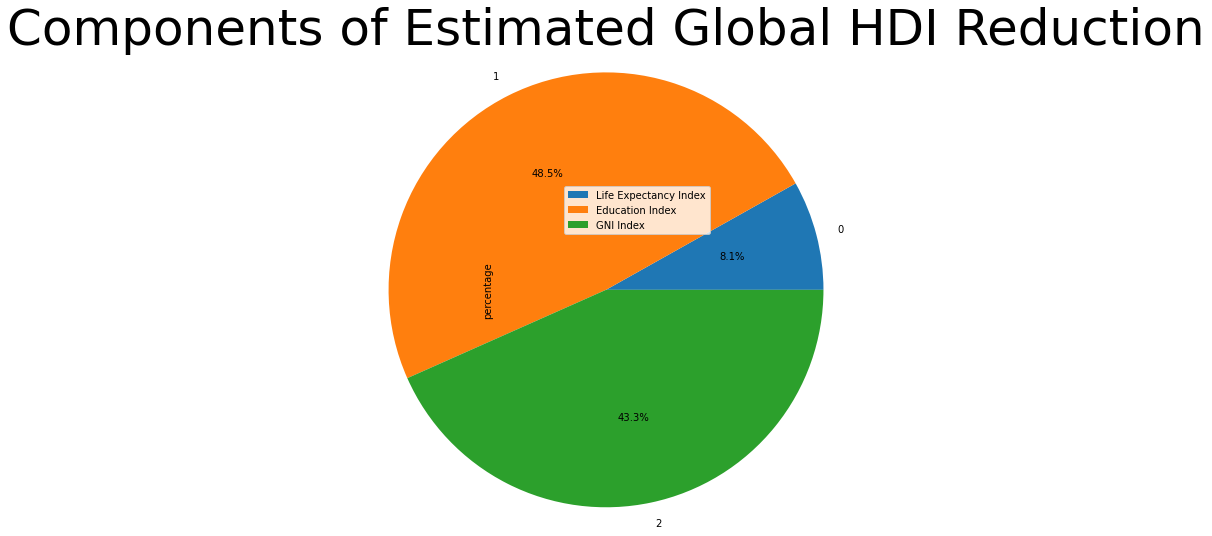

In [498]:
df.plot.pie(y = 'percentage', autopct='%0.1f%%', radius = 2.5)
plt.legend(('Life Expectancy Index', 'Education Index', 'GNI Index'))
plt.title('Components of Estimated Global HDI Reduction', y=1.6, fontsize=50)

Source: http://hdr.undp.org/sites/default/files/covid-19_and_human_development_0.pdf

In 2018, it was estimated that $100 billion would be needed to close the gap in internet access in low- and middle-income countries.

# References

[1] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0238678#:~:text=Given%20the%20uncertainty%20in%20fatality,4%20years%20in%20sub%2DSaharan

[2] http://hdr.undp.org/sites/default/files/covid-19_and_human_development_0.pdf